In [2]:
# nltk
# corpus(말)
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
para='Hello everyone.'
from nltk.tokenize import sent_tokenize
sent_tokenize(para)

['Hello everyone.']

In [4]:
para_kor='안녕하세요, 여러분. 만나서 반갑습니다. 이제 텍스트 마이닝을 클래스를 시작해봅시다.'
sent_tokenize(para)

['Hello everyone.']

In [5]:
from nltk.tokenize import word_tokenize
word_tokenize(para)

['Hello', 'everyone', '.']

In [6]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
print(tokenizer.tokenize("Can't is a contraction."))

['Can', "'", 't', 'is', 'a', 'contraction', '.']


In [7]:
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer("[\w']+") # 문자
tokenizer.tokenize("Can't is a contraction.")

["Can't", 'is', 'a', 'contraction']

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
from nltk.corpus import stopwords # 불용어
english_stops=set(stopwords.words('english'))
words=["Can't",'is','a','contraction']
[word for word in words if word not in english_stops] # 불용어를 제외

["Can't", 'contraction']

In [10]:
my_stops=['contraction','is']#커스터마이즈화된 불용어
[word for word in words if word not in my_stops]

["Can't", 'a']

In [11]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [12]:
from nltk import word_tokenize,pos_tag,ne_chunk
sentence='James is working at Disney in London'
sentence=pos_tag(word_tokenize(sentence))
print(sentence)

[('James', 'NNP'), ('is', 'VBZ'), ('working', 'VBG'), ('at', 'IN'), ('Disney', 'NNP'), ('in', 'IN'), ('London', 'NNP')]


In [13]:
from gensim.corpora import Dictionary
texts=[['human','interface','computer']]
dct=Dictionary(texts)
dct.add_documents([['cat','say','meow'],['dog']])
# bag of word : text frequency
dct.doc2bow(['dog','computer','non_existent_word'])

[(0, 1), (6, 1)]

- 사전에는 도메인에 중요한 단어들만 존재
- 사전은 도메인에서 자동으로 생성할 수 있고
- 사전에 추가로 데이터를 입력할 수 있고
- 사전에 있는 token과 id는 1:1로 매핑하기 때문에 
- 정방향이나 역방향으로 데이터를 확인할 수있다.

In [14]:
import pprint
text_corpus = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

In [15]:
stoplist=set('fot a of the and to in'.split(' ')) # 불용어
texts=[[word for word in document.lower().split() if word not in stoplist]
       for document in text_corpus]

from collections import defaultdict
frequency = defaultdict(int) # 키 데이터 중에 이 데이터는 숫자

# 숫자 카운트
for text in texts:
  for token in text:
    frequency[token]+=1

# 숫자 카운트해서 frequency가 1개 인거는 제거
processed_corpus=[[token for token in text if frequency[token]>1]
                  for text in texts]

pprint.pprint(processed_corpus)

from gensim import corpora
dictionary = corpora.Dictionary(processed_corpus)
print(dictionary)

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]
Dictionary<12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...>


In [16]:
pprint.pprint(dictionary.token2id)

{'computer': 0,
 'eps': 8,
 'graph': 10,
 'human': 1,
 'interface': 2,
 'minors': 11,
 'response': 3,
 'survey': 4,
 'system': 5,
 'time': 6,
 'trees': 9,
 'user': 7}


In [17]:
token_dict=dictionary.token2id
pprint.pprint(token_dict)
token_dict['computer']

{'computer': 0,
 'eps': 8,
 'graph': 10,
 'human': 1,
 'interface': 2,
 'minors': 11,
 'response': 3,
 'survey': 4,
 'system': 5,
 'time': 6,
 'trees': 9,
 'user': 7}


0

In [18]:
pprint.pprint(dictionary.id2token)
dictionary[10]

{}


'graph'

In [19]:
new_doc='Human computer interaction'
print(new_doc.lower().split())
new_vec=dictionary.doc2bow(new_doc.lower().split())
print(new_vec)

['human', 'computer', 'interaction']
[(0, 1), (1, 1)]


In [20]:
dictionary[0],dictionary[1]

('computer', 'human')

In [21]:
# 토큰이 한개 이상인 문서 
# 문서를 dictionary에 있는 단어의 개수로 변경
# bow는 text frequency로 구성
bow_corpus=[dictionary.doc2bow(text) for text in processed_corpus]
pprint.pprint(bow_corpus)

[[(0, 1), (1, 1), (2, 1)],
 [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(2, 1), (5, 1), (7, 1), (8, 1)],
 [(1, 1), (5, 2), (8, 1)],
 [(3, 1), (6, 1), (7, 1)],
 [(9, 1)],
 [(9, 1), (10, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(4, 1), (10, 1), (11, 1)]]


In [22]:
# text frequency and inverse document frequency로 구성 
# idf = 총문서수/ 단어가 들어있는 문서
# 단어가 들어있는 문서수가 작으면 중요한 단어로 취급됨
from gensim import models
tfidf=models.TfidfModel(bow_corpus)

In [23]:
dictionary[0],dictionary[1] # ('computer', 'human') 구성된 문서

('computer', 'human')

In [24]:
doc_bow=[(0,1),(1,1)]
print(tfidf[doc_bow])

[(0, 0.7071067811865476), (1, 0.7071067811865476)]


In [25]:
corpus_tfidf=tfidf[bow_corpus]
for doc in corpus_tfidf:
  print(doc)

[(0, 0.5773502691896257), (1, 0.5773502691896257), (2, 0.5773502691896257)]
[(0, 0.44424552527467476), (3, 0.44424552527467476), (4, 0.44424552527467476), (5, 0.3244870206138555), (6, 0.44424552527467476), (7, 0.3244870206138555)]
[(2, 0.5710059809418182), (5, 0.4170757362022777), (7, 0.4170757362022777), (8, 0.5710059809418182)]
[(1, 0.49182558987264147), (5, 0.7184811607083769), (8, 0.49182558987264147)]
[(3, 0.6282580468670046), (6, 0.6282580468670046), (7, 0.45889394536615247)]
[(9, 1.0)]
[(9, 0.7071067811865475), (10, 0.7071067811865475)]
[(9, 0.5080429008916749), (10, 0.5080429008916749), (11, 0.695546419520037)]
[(4, 0.6282580468670046), (10, 0.45889394536615247), (11, 0.6282580468670046)]


In [26]:
# Topic Analysis model : LSI(latent semantic indexing)
# Truncated SVD (singular value decomposition) (특이행렬분해)
# 특이치 중에 2개를 취함
lsi_model=models.LsiModel(corpus_tfidf,id2word=dictionary,num_topics=2)
corpus_lsi=lsi_model[corpus_tfidf]

In [27]:
lsi_model.print_topics(2)

[(0,
  '0.703*"trees" + 0.538*"graph" + 0.402*"minors" + 0.187*"survey" + 0.061*"system" + 0.060*"time" + 0.060*"response" + 0.058*"user" + 0.049*"computer" + 0.035*"interface"'),
 (1,
  '-0.460*"system" + -0.373*"user" + -0.332*"eps" + -0.328*"interface" + -0.320*"time" + -0.320*"response" + -0.293*"computer" + -0.280*"human" + -0.171*"survey" + 0.161*"trees"')]

In [28]:
for doc,as_text in zip(corpus_lsi,text_corpus):
  print(doc,as_text)

[(0, 0.0660078339609035), (1, -0.5200703306361862)] Human machine interface for lab abc computer applications
[(0, 0.19667592859142546), (1, -0.7609563167700044)] A survey of user opinion of computer system response time
[(0, 0.08992639972446394), (1, -0.7241860626752517)] The EPS user interface management system
[(0, 0.07585847652178117), (1, -0.632055158600344)] System and human system engineering testing of EPS
[(0, 0.10150299184980174), (1, -0.5737308483002947)] Relation of user perceived response time to error measurement
[(0, 0.7032108939378311), (1, 0.16115180214025787)] The generation of random binary unordered trees
[(0, 0.8774787673119835), (1, 0.16758906864659417)] The intersection graph of paths in trees
[(0, 0.9098624686818584), (1, 0.14086553628719045)] Graph minors IV Widths of trees and well quasi ordering
[(0, 0.6165825350569288), (1, -0.053929075663893225)] Graph minors A survey


In [29]:
# LsiModel의 저장과 로딩
import os
import tempfile
with tempfile.NamedTemporaryFile(prefix='model-',suffix='.lsi',delete=False) as tmp:
  lsi_model.save(tmp.name)

In [30]:
loaded_lsi_model=models.LsiModel.load(tmp.name)
os.unlink(tmp.name)

In [31]:
# 다시 모델 만듦
lsi=models.LsiModel(corpus_tfidf,id2word=dictionary,num_topics=2)
doc='Human computer interaction' # 새로운 문서
vec_bow=dictionary.doc2bow(doc.lower().split())
vec_lsi=lsi[vec_bow]
print(vec_lsi) # 어떤 topic과 가까운지를 확인

[(0, 0.0791047511744478), (1, -0.5732835243079398)]


In [32]:
from gensim import similarities
index=similarities.MatrixSimilarity(lsi[corpus_tfidf])
print(index) # 9docs 새로 들어 온 서류가 비슷한 서류의 인덱스 

MatrixSimilarity<9 docs, 2 features>


In [33]:
index.save('/deerwester.index')
inex=similarities.MatrixSimilarity.load('/deerwester.index')

In [34]:
sims=index[vec_lsi]
print(list(enumerate(sims)))

[(0, 0.9999408), (1, 0.99330217), (2, 0.99990785), (3, 0.99984384), (4, 0.9992786), (5, -0.08804217), (6, -0.0515742), (7, -0.016480923), (8, 0.2224844)]


In [35]:
# 주제면에서 어떤 문서와 유사한지 확인
# 각 문서와 얼마나 유사한지 확인할 수 있음

sims=sorted(enumerate(sims),key=lambda item: - item[1])
for i,s in enumerate(sims):
  print(s,text_corpus[i])
# 새로 입력된 문서는 0번 토픽하고 가깝고 각 학습데이터하고 유사도

(0, 0.9999408) Human machine interface for lab abc computer applications
(2, 0.99990785) A survey of user opinion of computer system response time
(3, 0.99984384) The EPS user interface management system
(4, 0.9992786) System and human system engineering testing of EPS
(1, 0.99330217) Relation of user perceived response time to error measurement
(8, 0.2224844) The generation of random binary unordered trees
(7, -0.016480923) The intersection graph of paths in trees
(6, -0.0515742) Graph minors IV Widths of trees and well quasi ordering
(5, -0.08804217) Graph minors A survey


# nltk의 movie_reviews 데이터를 이용해서 데이터를 Word2vec으로 처리한 다음 벡터간 유사 단어를 찾아보는 과정

In [36]:
import nltk
nltk.download('punkt')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [37]:
from nltk.corpus import movie_reviews
print(movie_reviews.words())
movie_reviews.sents()

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]


[['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.'], ['they', 'get', 'into', 'an', 'accident', '.'], ...]

In [38]:
sentences=[list(s) for s in movie_reviews.sents()]
print('0번문장',sentences[0])
print('1번문장',sentences[1])

0번문장 ['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.']
1번문장 ['they', 'get', 'into', 'an', 'accident', '.']


In [39]:
from gensim.models.word2vec import Word2Vec
model=Word2Vec(sentences) # 단어를 벡터화 하고 벡터화된 단어사이의 유사도를 계산 
model_name='test1'
model.save(model_name)

In [40]:
print(model.wv.similarity('actor','actress'))
print(model.wv.similarity('actor','she'))
print(model.wv.most_similar('accident'))

0.89889944
0.25538418
[('abandoned', 0.8669315576553345), ('bus', 0.8530287742614746), ('egyptian', 0.848678708076477), ('radio', 0.8404263854026794), ('truck', 0.8359251618385315), ('church', 0.8330092430114746), ('bar', 0.8317557573318481), ('building', 0.8274145722389221), ('plane', 0.8243065476417542), ('army', 0.8226127028465271)]


In [41]:
model.wv.doesnt_match('man woman child kitchen'.split())

'kitchen'

In [42]:
model.wv.most_similar('man')

[('woman', 0.8921539187431335),
 ('girl', 0.8099887371063232),
 ('child', 0.8037123084068298),
 ('boy', 0.7945414185523987),
 ('killer', 0.7636874318122864),
 ('doctor', 0.7202470302581787),
 ('person', 0.7085418105125427),
 ('guy', 0.7070409655570984),
 ('kid', 0.706780731678009),
 ('secret', 0.6720307469367981)]

In [43]:
print(model.wv.most_similar(positive=['actor','she'],negative='actress',topn=3))

[('he', 0.8535711169242859), ('everyone', 0.673468291759491), ('him', 0.6236652731895447)]


In [44]:
# 군집을 시각화 하는데 특화 TSNE
from sklearn.manifold import TSNE # 가까운 것은 더 가깝게 먼 것은 더 멀게
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim
import gensim.models as g

In [45]:
mpl.rcParams['axes.unicode_minus']=False
vocab=model.wv.key_to_index.keys()
X=[]
for word in vocab:
  X.append(model.wv.get_index(word))
X=model.wv[vocab]
print(len(X))
print(X[0][:10])
tsne=TSNE(n_components=2)
X_tsne=tsne.fit_transform(X[:100,:])

14794
[-0.7418253  -0.5146747   0.90951097  0.94177413 -0.16510637 -0.78884834
  0.11073066  0.2953052  -0.2630837  -0.148956  ]


In [46]:
import pandas as pd
df=pd.DataFrame(X_tsne, index=list(model.wv.key_to_index.keys())[:100], columns=['x','y'])
print(df.shape)
df.head(10)

(100, 2)


,x,y
",",4.075613,-5.715631
the,3.097020,-3.184740
.,4.374147,-6.085689
a,3.486886,-2.052093
and,4.438085,-5.841033
of,3.293847,-8.376243
to,7.277462,-2.440797
',1.917460,-8.553980
is,7.087312,-4.933377
in,6.622416,-7.219078


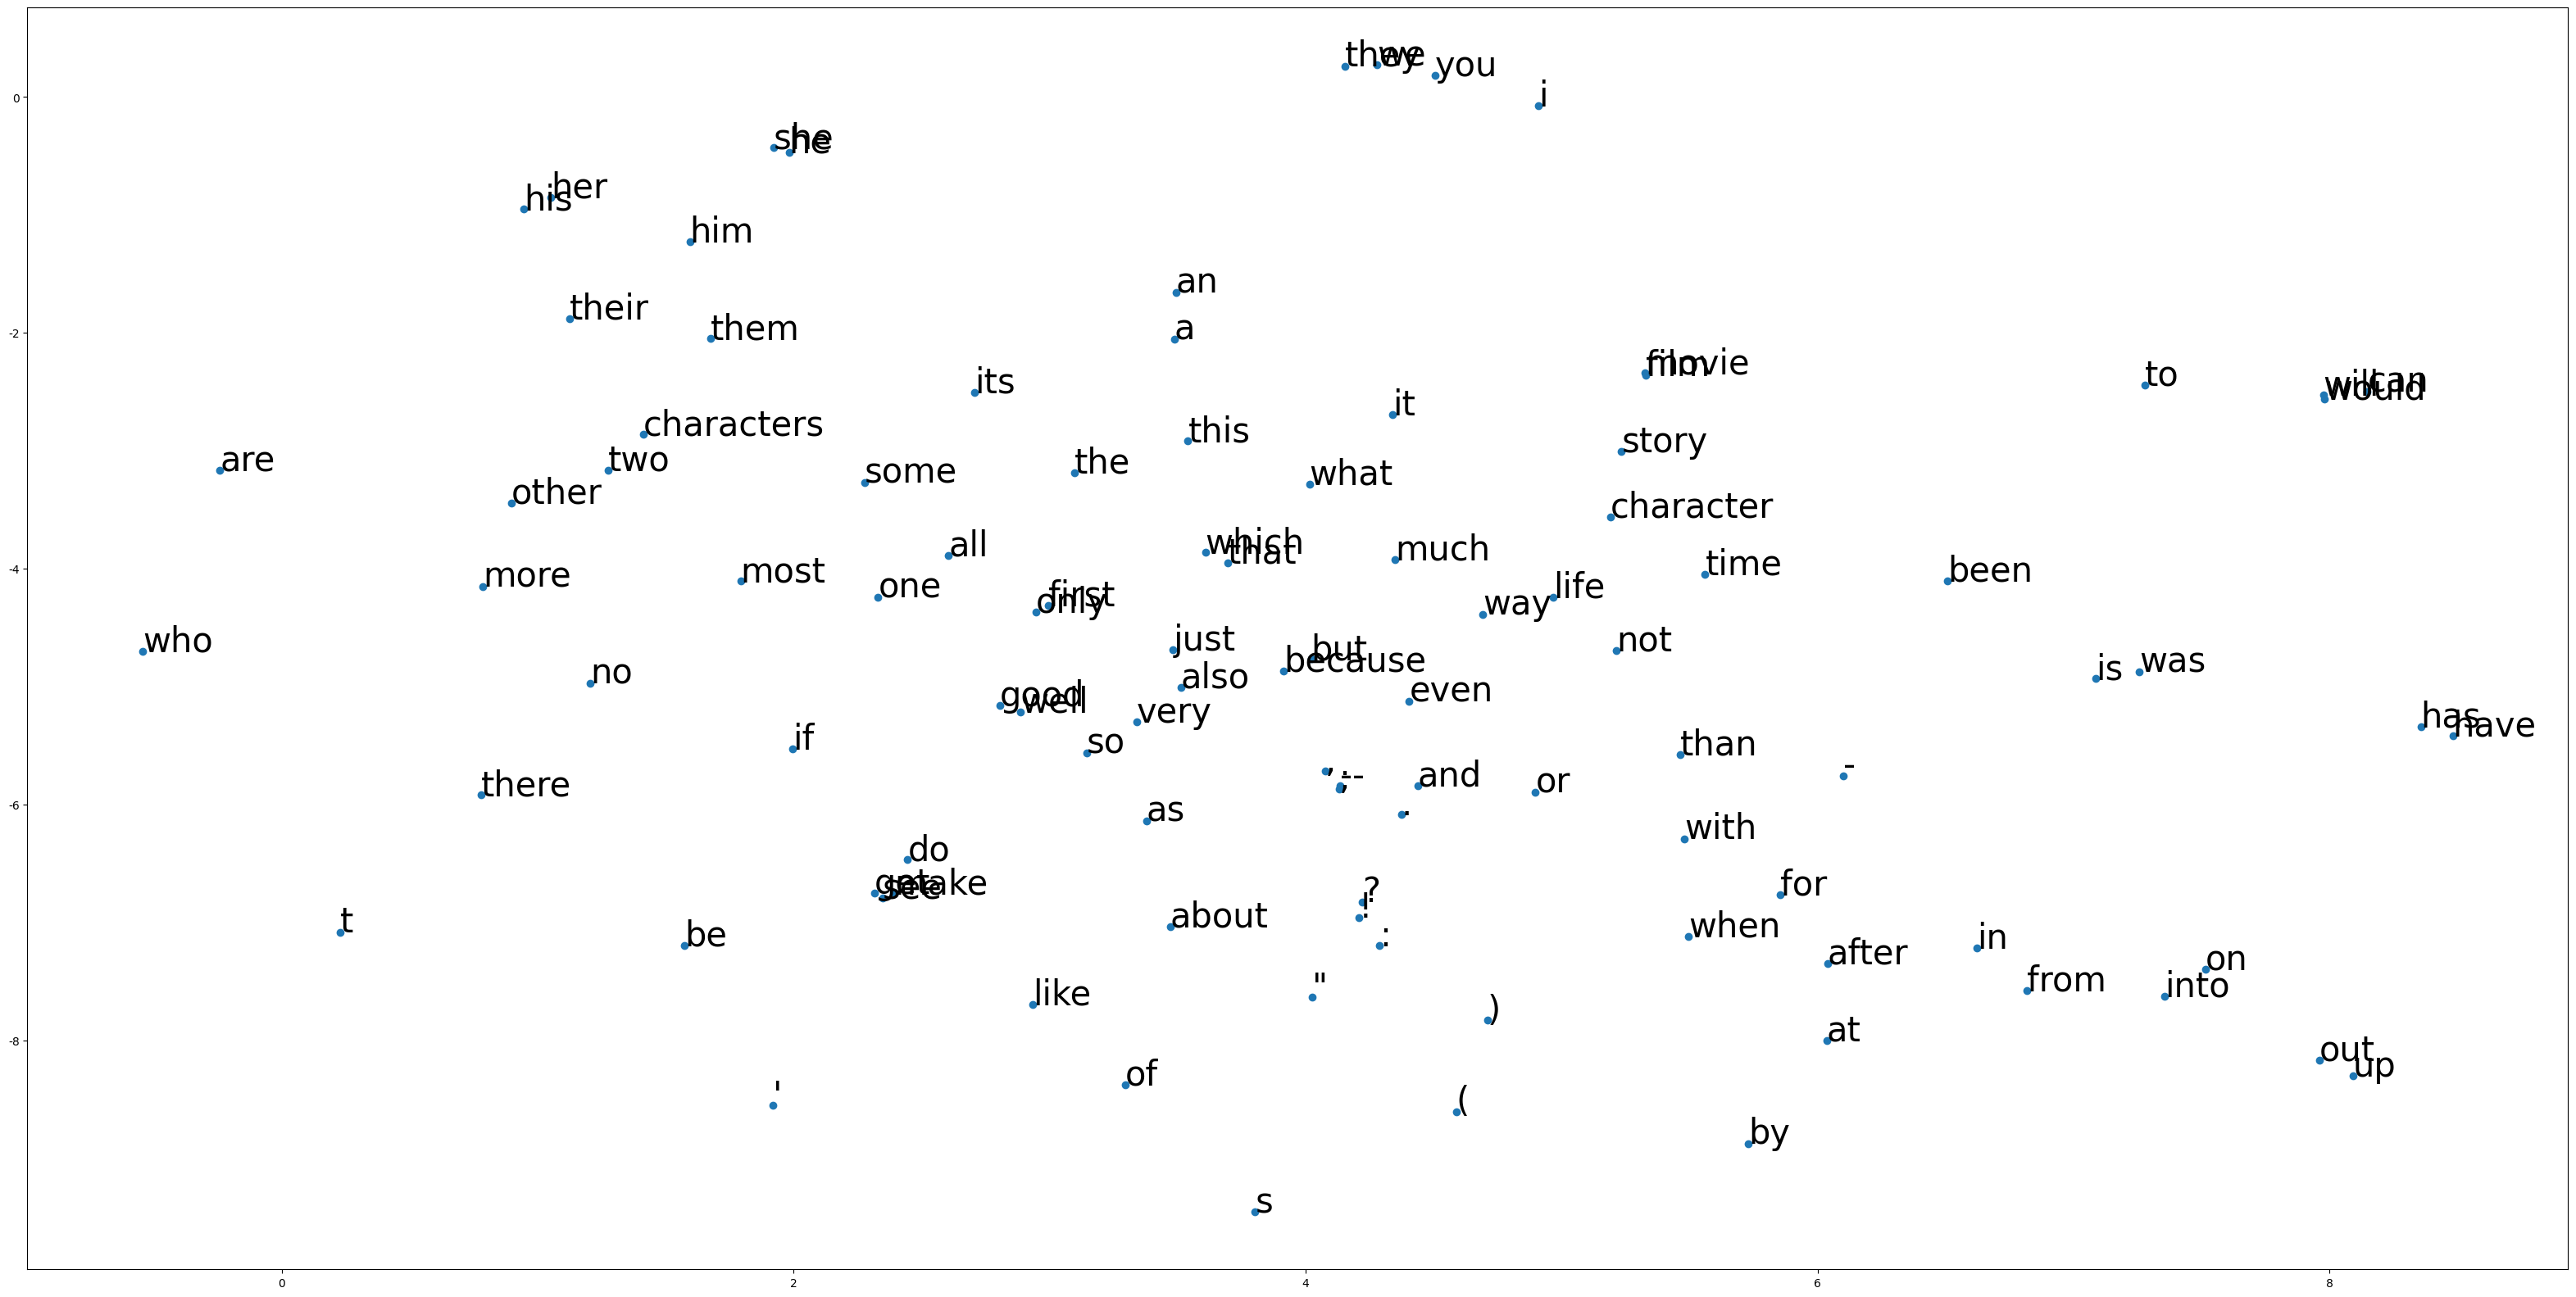

In [47]:
fig=plt.figure()
fig.set_size_inches(40,20)
ax=fig.add_subplot(1,1,1)

ax.scatter(df['x'],df['y'])

for word,pos in df.iterrows():
  ax.annotate(word,pos,fontsize=30)
plt.show()

In [48]:
!pip install Pyro4
!pip install jpype1
!pip install konlpy
!pip install simplejson
!pip install pygame
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 4.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 10.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 77.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 4.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
import warnings
warnings.simplefilter('ignore')

import konlpy
konlpy.__version__
# nouns  : 명사추출
# morphs : 형태소 추출
# pos    : 품사 부착 

'0.6.0'

In [50]:
from konlpy.tag import Kkma # 꼬꼬마(서울대), Hannanum : KAIST
from konlpy.utils import pprint
kkma=Kkma()
pprint(kkma.sentences(u'네, 안녕하세요., 반갑습니다.'))

['네, 안녕하세요.,', '반갑습니다.']


In [51]:
kkma=Kkma()
pprint(kkma.nouns(u'아버지가 방에 들어가신다. 그 방에는 내 동생이 있다.'))

['아버지', '방', '내', '동생']


In [52]:
from konlpy.tag import Hannanum
hannanum = Hannanum()
print(hannanum.analyze(u'롯데마트의 흑마늘 양념 치킨이 논란이 되고 있다.'))
print(hannanum.morphs(u'롯데마트의 흑마늘 양념 치킨이 논란이 되고 있다.'))
print(hannanum.nouns(u'다람쥐 헌 쳇바퀴에 타고파'))
print(hannanum.pos(u'웃으면 더 행복합니다!'))

[[[('롯데마트', 'ncn'), ('의', 'jcm')], [('롯데마트의', 'ncn')], [('롯데마트', 'nqq'), ('의', 'jcm')], [('롯데마트의', 'nqq')]], [[('흑마늘', 'ncn')], [('흑마늘', 'nqq')]], [[('양념', 'ncn')]], [[('치킨', 'ncn'), ('이', 'jcc')], [('치킨', 'ncn'), ('이', 'jcs')], [('치킨', 'ncn'), ('이', 'ncn')]], [[('논란', 'ncpa'), ('이', 'jcc')], [('논란', 'ncpa'), ('이', 'jcs')], [('논란', 'ncpa'), ('이', 'ncn')]], [[('되', 'nbu'), ('고', 'jcj')], [('되', 'nbu'), ('이', 'jp'), ('고', 'ecc')], [('되', 'nbu'), ('이', 'jp'), ('고', 'ecs')], [('되', 'nbu'), ('이', 'jp'), ('고', 'ecx')], [('되', 'paa'), ('고', 'ecc')], [('되', 'paa'), ('고', 'ecs')], [('되', 'paa'), ('고', 'ecx')], [('되', 'pvg'), ('고', 'ecc')], [('되', 'pvg'), ('고', 'ecs')], [('되', 'pvg'), ('고', 'ecx')], [('되', 'px'), ('고', 'ecc')], [('되', 'px'), ('고', 'ecs')], [('되', 'px'), ('고', 'ecx')]], [[('있', 'paa'), ('다', 'ef')], [('있', 'px'), ('다', 'ef')]], [[('.', 'sf')], [('.', 'sy')]]]
['롯데마트', '의', '흑마늘', '양념', '치킨', '이', '논란', '이', '되', '고', '있', '다', '.']
['다람쥐', '쳇바퀴', '타고파']
[('웃', 'P'), ('으면', 'E'), 

In [53]:
from konlpy.tag import Okt
okt=Okt()
print(okt.morphs(u'단독입찰보다 복수입찰의 경우'))
print(okt.nouns(u'유일하게 항공기 체계 종합개발 경험을 갖고 있는 KAI는'))

['단독', '입찰', '보다', '복수', '입찰', '의', '경우']
['항공기', '체계', '종합', '개발', '경험']


In [54]:
# 원하는 품사만 취하기
voc='어제 오후 6시 24분으로 예정됐던 누리호 3차 발사가 예정 시각을 2시간여 앞두고 연기됐습니다. \
헬륨 공급과 관련된 컴퓨터 간 통신 이상으로 확인됐는데 항우연은 설비나 누리호 자체 이상은 아니라고 밝혔습니다. \
항우연은 조금 뒤인 11시 발사관리위원회를 열어 발사 여부를 결정할 예정인데요. \
문제를 해결하면서 오늘 예정대로 발사가 가능한 상황인 분위기인 것으로 전해지고 있습니다. \
이창진 건국대 기계항공공학부 교수와 함께 이야기 나눠보겠습니다.'

okt_pos=Okt().pos(voc,norm=True,stem=True)
# 명사 형용사 동사
okt_filtering =[x for x,y in okt_pos if y in ['Noun','Adjective', 'Verb']]
print(okt_filtering)
print(len(okt_filtering))
okt_len=pd.Series(okt_filtering)
okt_len=okt_len.apply(len)
df=pd.DataFrame({'word':okt_filtering,'len':okt_len})
df[df['len']>1]


['어제', '오후', '예정', '돼다', '누리', '호', '차', '발사', '예정', '시각', '앞두다', '연기', '돼다', '헬륨', '공급', '관련', '되다', '컴퓨터', '간', '통신', '이상', '확인', '돼다', '항우연', '설비', '누리', '호', '자체', '이상은', '아니다', '밝히다', '항우연', '조금', '뒤', '발사', '관리', '위원회', '열다', '발사', '여부', '결정', '하다', '예정', '요', '문제', '해결', '하다', '오늘', '예정', '발사', '가능하다', '상황', '분위기', '것', '전해지다', '있다', '이창진', '건국대', '기계', '항공공학', '부', '교수', '이야기', '나누다', '보다']
65


,word,len
0,어제,2
1,오후,2
2,예정,2
3,돼다,2
4,누리,2
7,발사,2
8,예정,2
9,시각,2
10,앞두다,3
11,연기,2


In [55]:
# konipy + nltk  + wordcloud

In [56]:
!apt-get -qq -y install fonts-nanum > /dev/null
fontpath='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

[('손흥민', 14), ('경기', 7), ('골', 7), ('토트넘', 5), ('달', 4), ('스포', 3), ('탈', 3), ('코리아', 3), ('시즌', 3), ('초', 3)]


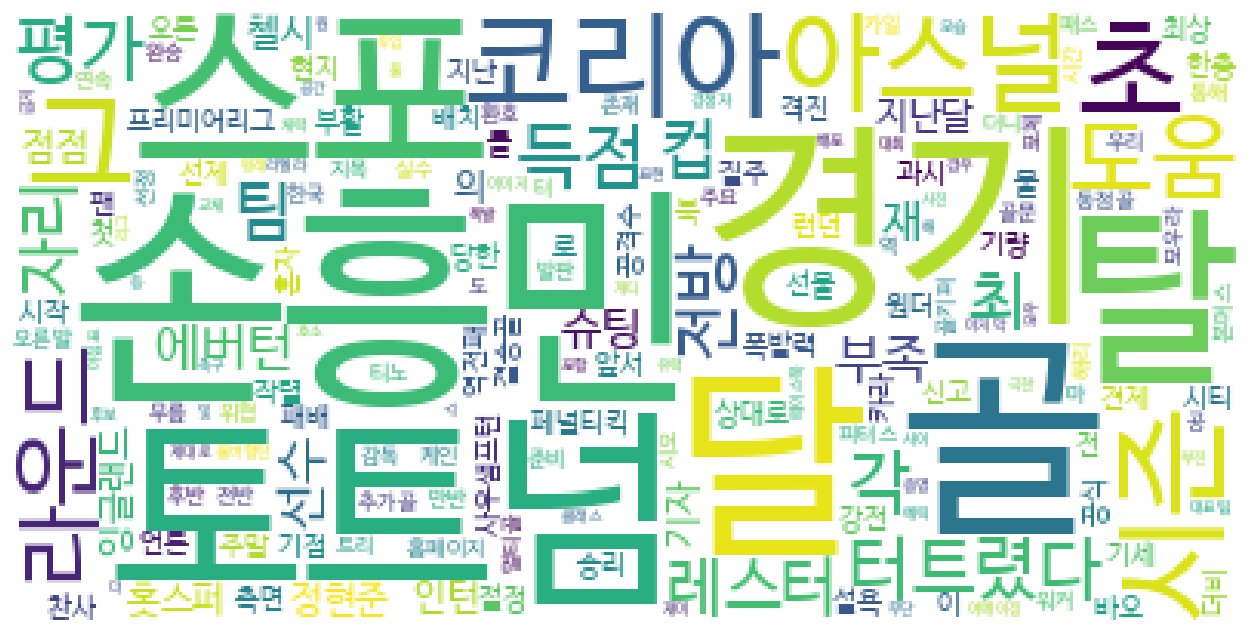

In [57]:
import requests
from bs4 import BeautifulSoup # crawling
from konlpy.tag import Twitter
from wordcloud import WordCloud # 단점 : 글꼴을 지원하지 않음 
import matplotlib.pyplot as plt

res=requests.get('https://sports.v.daum.net/v/20181227140914322')
soup=BeautifulSoup(res.content,'html.parser') # html tree로 구성
body=soup.select('.article_view')[0] # css3인경우
text=' '.join(p.get_text() for p in body.find_all('p')) # p tag를 발견
t=Twitter()
tokens_ko=t.nouns(text) # 명사
ko=nltk.Text(tokens_ko,name='스포츠')
print(ko.vocab().most_common(10)) # 빈도가 가장 많은 명사 
data=ko.vocab().most_common(500)
stopwords = ['점점','지난','측면','기세','북','격진','더비','시오','포체','기점','의','이','당한','로','오른','사이','탈']
tokens=[each_word for each_word in data if each_word not in stopwords]
tmp_data=dict(tokens) # 도수를 카운트하면서
wordcloud=WordCloud(relative_scaling=0.1, font_path=fontpath, # 도수 크기의 0.1만
                    background_color='white',).generate_from_frequencies(tmp_data)

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

[('웹툰', 9), ('기술', 7), ('독자', 6), ('생', 6), ('를', 6), ('등', 6), ('점', 6), ('작업', 6), ('이', 5), ('성형', 5)]


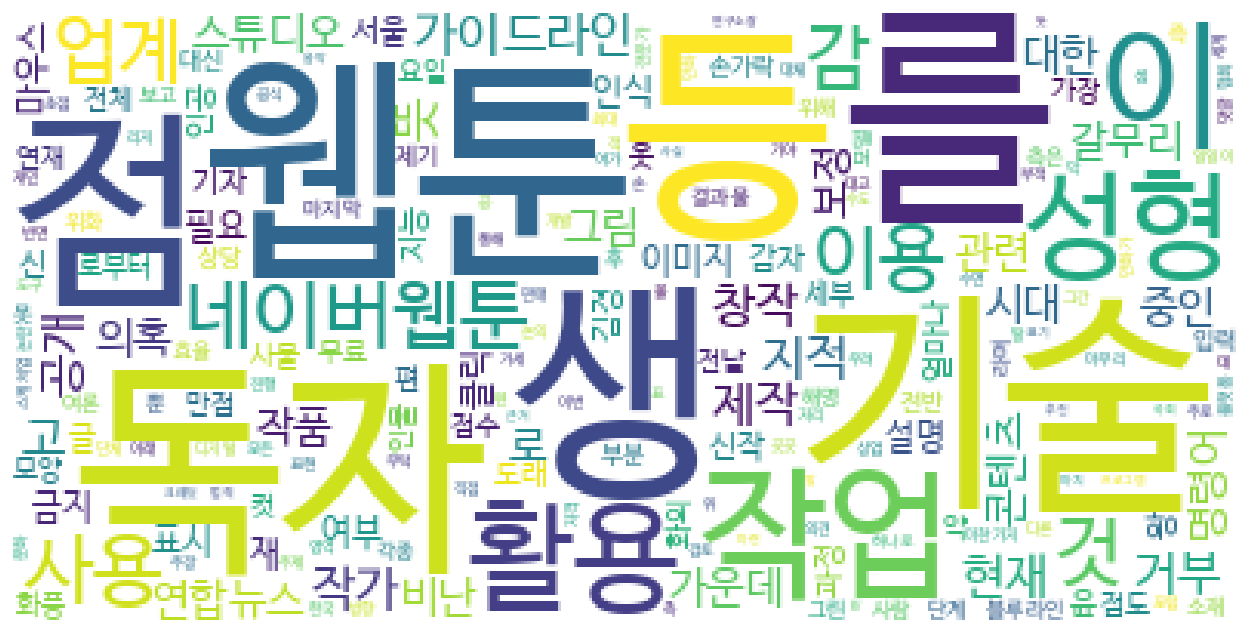

In [58]:
# 다른 사이트를 크롤링해서 wordcloud로 표현해보시오

import requests
from bs4 import BeautifulSoup # crawling
from konlpy.tag import Twitter
from wordcloud import WordCloud # 단점 : 글꼴을 지원하지 않음 
import matplotlib.pyplot as plt

res=requests.get('https://www.yna.co.kr/view/AKR20230523168600005?section=culture/cartoon')
soup=BeautifulSoup(res.content,'html.parser') # html tree로 구성
body=soup.select('.article')[0] # css3인경우

text=' '.join(p.get_text() for p in body.find_all('p')) # p tag를 발견
t=Twitter()
tokens_ko=t.nouns(text) # 명사
ko=nltk.Text(tokens_ko,name='스포츠')
print(ko.vocab().most_common(10)) # 빈도가 가장 많은 명사 
data=ko.vocab().most_common(500)
stopwords = [
    '은', '는', '이', '가', '을', '를', '으로', '로', '에서', '이나', '든지',
    '까지', '부터', '에게', '한테', '에게서', '에', '에서', '와', '과', '의',
    '때문에', '이어서', '이라서', '라서', '뿐만 아니라', '이든지', '든지',
    '이나마', '나마', '이라도', '라도', '에도', '에만', '만', '조차', '까지도',
    '마저', '조차도', '하고', '이고', '와', '과', '랑', '이나', '나', '처럼',
    '같이', '같이', '만큼', '훨씬', '더', '더욱', '더불어', '한편으로는',
    '비록', '아니라도', '아니면', '아니었다면', '아니었으면', '아니었다면',
    '아니면', '아니거나', '하지 않으면', '하지 않다면', '하지 않아도',
    '하지 않았으면', '하지 않았다면', '못하다', '못했다', '못한다', '못하는',
    '못한', '못된', '아니다', '않다', '안된다', '않는다', '안하는',
    '않은', '않을', '않으며', '않으나', '않는', '않은', '않을',
    '않으며', '않으나', '않는', '않았으면', '않았다면', '않았다',
    '않았을', '않았으며', '않았으나', '말고', '말고도', '뿐',
    '뿐만', '뿐만아니라', '한데', '그리고', '그러나', '하지만', '그런데',
    '그러므로', '때문에', '따라서', '그래서', '그러니', '그러니까', '이',
    '저', '그', '저희', '그들', '너', '너희', '당신', '이들', '우리',
    '제', '때', '번', '위해', '통해', '을', '를', '에', '의', '에서'
]
tokens=[each_word for each_word in data if each_word not in stopwords]
tmp_data=dict(tokens) # 도수를 카운트하면서
wordcloud=WordCloud(relative_scaling=0.1, font_path=fontpath, # 도수 크기의 0.1만
                    background_color='white',).generate_from_frequencies(tmp_data)

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from konlpy.tag import Komoran
documents=[
    '안녕하세요. 저는 자연어 처리에 관심이 있습니다.',
    '컴퓨터 공학과 학생입니다. 기계학습에 관심이 많아요',
    '한국어 자연어 처리는 어려운 부분이 많습니다.',
    'Konlpy를 사용하면 한국어 처리가 쉬워집니다.'
]
komoran=Komoran()
corpus=[' '.join(komoran.morphs(doc)) for doc in documents]
komoran=Komoran()
corpus=[' '.join(komoran.morphs(doc)) for doc in documents]
vectorizer=TfidfVectorizer()
tfidf=vectorizer.fit_transform(corpus)
svd=TruncatedSVD(n_components=2)
lsi=svd.fit_transform(tfidf)

print('LSI 결과:')
for i,doc in enumerate(documents):
  print(f'문서 {i+1}:{doc}')
  print(f'LSI 벡터:{lsi[i]}')
  print()

LSI 결과:
문서 1:안녕하세요. 저는 자연어 처리에 관심이 있습니다.
LSI 벡터:[ 0.7585336  -0.16057101]

문서 2:컴퓨터 공학과 학생입니다. 기계학습에 관심이 많아요
LSI 벡터:[0.2737592 0.8994365]

문서 3:한국어 자연어 처리는 어려운 부분이 많습니다.
LSI 벡터:[ 0.8008902  -0.33303915]

문서 4:Konlpy를 사용하면 한국어 처리가 쉬워집니다.
LSI 벡터:[0.55361258 0.25703404]



In [60]:
path='/content/drive/MyDrive/daejeon_1/winemag.csv'
df=pd.read_csv(path,index_col=0)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [61]:
df.shape

(129971, 13)

In [62]:
df.columns # 비지도 학습 -> 데이터 전처리 시각화 데이터요약 군집분석 -> 지도학습

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

In [63]:
df.country[0]

'Italy'

In [64]:
country=df.groupby('country')
country.describe().head() # 숫자만 설명

points                                                 \
                         count       mean       std   min    25%   50%    75%   
country                                                                         
Argentina               3800.0  86.710263  3.179627  80.0  84.00  87.0  89.00   
Armenia                    2.0  87.500000  0.707107  87.0  87.25  87.5  87.75   
Australia               2329.0  88.580507  2.989900  80.0  87.00  89.0  91.00   
Austria                 3345.0  90.101345  2.499799  82.0  88.00  90.0  92.00   
Bosnia and Herzegovina     2.0  86.500000  2.121320  85.0  85.75  86.5  87.25   

                                price                                     \
                          max   count       mean        std   min    25%   
country                                                                    
Argentina                97.0  3756.0  24.510117  23.430122   4.0  12.00   
Armenia                  88.0     2.0  14.500000   0.707107  14.0  14.25   
Australia               100.0  2294.0  35.437663  49.049458   5.0  15.00   
Austria                  98.0  2799.0  30.762772  27.224797   7.0  18.00   
Bosnia and Herzegovina   88.0     2.0  12.500000   0.707107  12.0  12.25   

                                             
                         50%    75%     max  
country                                      
Argentina               17.0  25.00   230.0  
Armenia                 14.5  14.75    15.0  
Australia               21.0  38.00   850.0  
Austria                 25.0  36.50  1100.0  
Bosnia and Herzegovina  12.5  12.75    13.0

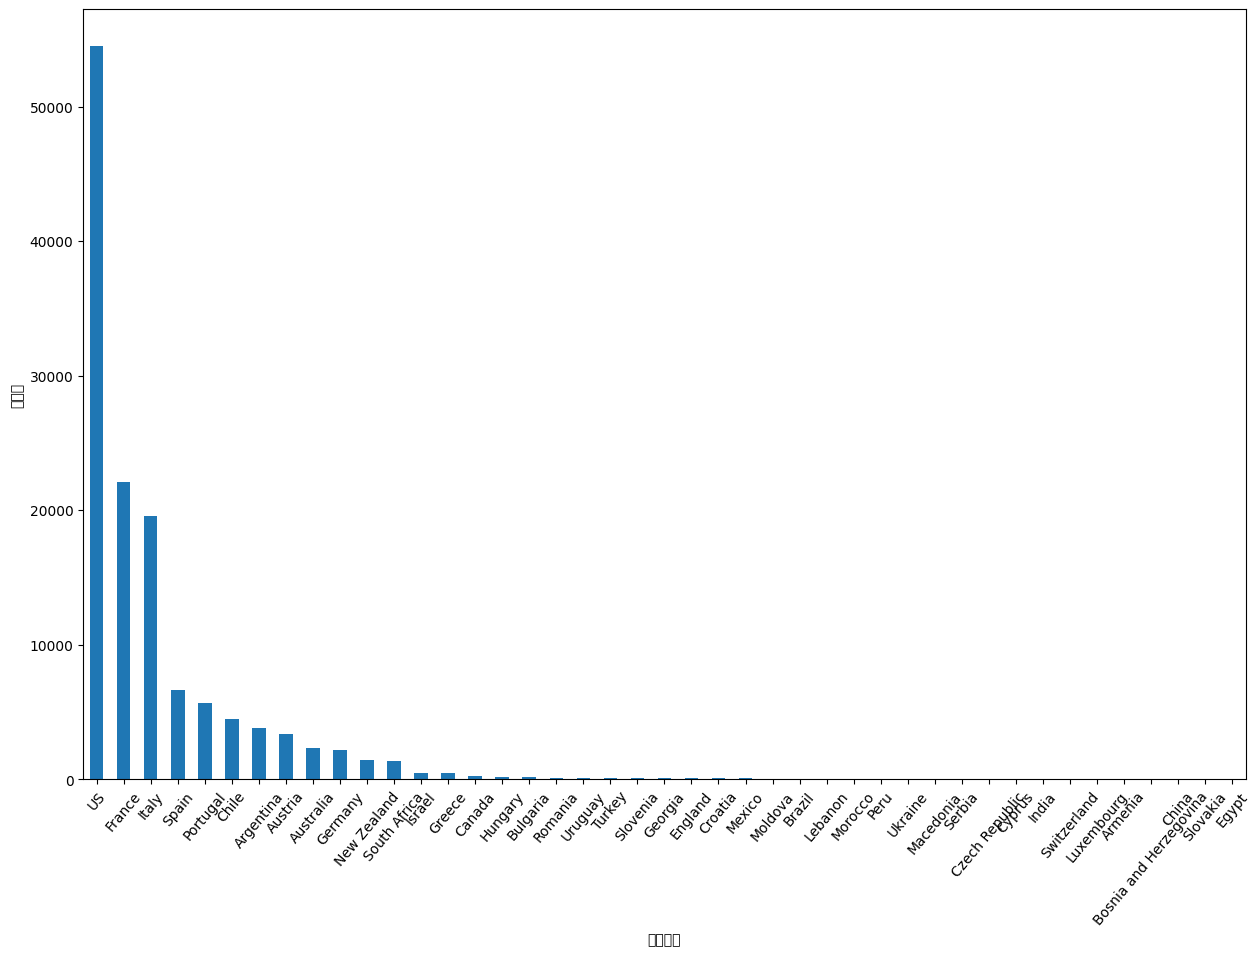

In [65]:
# 문제
# 나라별 개수(wine)를 시각화 해보시오

plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel('생산국가')
plt.ylabel('와인수')
plt.show()

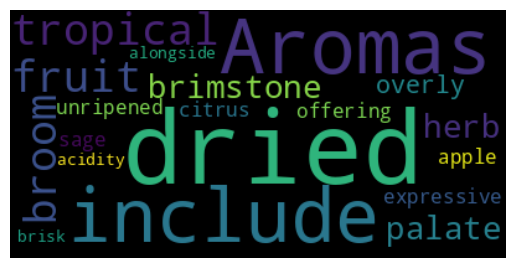

In [66]:
# 문제 
# df.description[3] -> WordCloud로 시각화
text=df.description[0]
wordcloud=WordCloud(max_words=20).generate_from_text(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [67]:
wordcloud.to_file('winw_review1.png')

In [68]:
# 문제 
# description에 있는 모든 단어 숫자를 카운팅
# wordcloud로 시각화

text=' '.join(review for review in df.description)
print('{}의 단어로 이루어진 와인평'.format(len(text)))

31661073의 단어로 이루어진 와인평


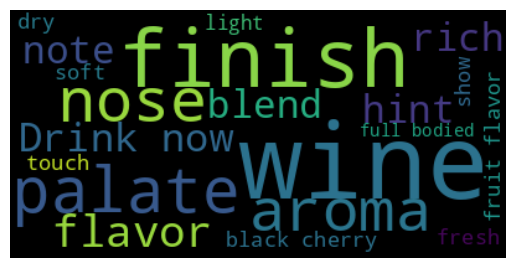

In [69]:
wordcloud=WordCloud(max_words=20).generate_from_text(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [70]:
# 문제 
# description 중에 개수를 카운트해서 50개 이하인 것은 제외하고 
# 나머지를 별도의 데이터 프레임에 담기

# 내가한거
import pandas as pd

# df.description에서 텍스트의 개수 카운트
text_counts = df.description.apply(lambda x: len(x.split()))

# 50개 이상인 텍스트만 유지
filtered_df = df[text_counts > 50]

filtered_df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
19,US,"Red fruit aromas pervade on the nose, with cig...",NaN,87,32.0,Virginia,Virginia,NaN,Alexander Peartree,NaN,Quiévremont 2012 Meritage (Virginia),Meritage,Quiévremont
36,Chile,"White flower, lychee and apple aromas carry th...",Estate,86,15.0,Colchagua Valley,NaN,NaN,Michael Schachner,@wineschach,Estampa 2011 Estate Viognier-Chardonnay (Colch...,Viognier-Chardonnay,Estampa
51,Chile,This is much different than Casa Silva's 2009 ...,Gran Reserva,85,22.0,Colchagua Valley,NaN,NaN,Michael Schachner,@wineschach,Casa Silva 2008 Gran Reserva Petit Verdot (Col...,Petit Verdot,Casa Silva
81,Spain,"Bland, mature aromas of white fruits are on th...",NaN,86,16.0,Galicia,Rías Baixas,NaN,Michael Schachner,@wineschach,Spyro 2014 Albariño (Rías Baixas),Albariño,Spyro
97,US,A wisp of bramble extends a savory tone from n...,Ingle Vineyard,88,20.0,New York,Finger Lakes,Finger Lakes,Anna Lee C. Iijima,NaN,Heron Hill 2015 Ingle Vineyard Riesling (Finge...,Riesling,Heron Hill


In [71]:
# 수업내용
df['len']=df['description'].apply(lambda x:len(x.split(' ')))
winedf=df[df['len']>=50]
winedf.shape

(24459, 14)

In [72]:
# spacy 패키지
# 고속으로 동작 GPU에서 사용가능
!pip install spacy
!spacy download en_core_web_sm
!spacy download ko_core_news_sm # lg도 음 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-05-25 06:56:15.386788: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-25 06:56:16.444900: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-25 06:56:18.231016: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-25 06:56:18.231595: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node rea

In [73]:
import spacy
from spacy.lang.ko.examples import sentences
documents=[
    '안녕하세요. 저는 자연어 처리에 관심이 있습니다.',
    '컴퓨터 공학과 학생입니다. 기계학습에 관심이 많아요',
    '한국어 자연어 처리는 어려운 부분이 많습니다.',
    'Konlpy를 사용하면 한국어 처리가 쉬워집니다.'
]
nlp=spacy.load('ko_core_news_sm')
doc=nlp(documents[0])
print(doc.text)

안녕하세요. 저는 자연어 처리에 관심이 있습니다.


In [74]:
for token in doc:
  print(token.text,
        token.lemma_,    # 표제어
        token.pos_,      # 단어의 품사
        token.tag_,      # 자세한 품사
        token.is_stop,   # 불용어 여부
        token.dep_,      # 의존 관계
        token.head)      # 지배소 

안녕하세요 안녕하+세+요 VERB ncn+jp+ef False ROOT 안녕하세요
. . PUNCT sf False punct 안녕하세요
저는 저+는 PRON npp+jxt False dislocated 있습니다
자연어 자연+어 NOUN ncn+jcs False nsubj 처리에
처리에 처리에 NOUN ncn+jcm False nmod 관심이
관심이 관심+이 NOUN ncpa+jcs False nsubj 있습니다
있습니다 있+습니다 ADJ paa+ef False ROOT 있습니다
. . PUNCT sf False punct 있습니다


In [75]:
import spacy as sp
sp.prefer_gpu()

True

In [76]:
import en_core_web_sm
nlp=en_core_web_sm.load()

In [77]:
import re
# dictionary, stopwords, 데이터 타입 판별 
def clean_text(doc):
  doc=nlp(doc)
  tokens=[]
  exclusion_list=['nan'] # 특별하게 제외해야할 정보 ( 도메인에 고려대상이 아님 )
  for token in doc:
    if token.is_stop or token.is_punct or token.text.isnumeric() or (token.text.isalnum()==False) \
    or token.text in exclusion_list:
      continue
    token=str(token.lemma_.lower().strip())
    tokens.append(token)
  return ' '.join(tokens) # 정제된 텍스트 

winedf['cleaned_description']=winedf.apply(lambda row:clean_text(row['description']),axis=1)
winedf.reset_index(inplace=True)

In [78]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
winedf['title_id']=le.fit_transform(winedf['title'])
contentdf=winedf[['title_id','title','description','cleaned_description']]
contentdf=contentdf.set_index('title_id')
contentdf.reset_index(inplace=True)
contentdf

,title_id,title,description,cleaned_description
0,16891,Quiévremont 2012 Meritage (Virginia),"Red fruit aromas pervade on the nose, with cig...",red fruit aroma pervade nose cigar box menthol...
1,5092,Clarksburg Wine Company 2010 Chenin Blanc (Cla...,Clarksburg is becoming a haven for Chenin Blan...,clarksburg haven chenin blanc california bottl...
2,8085,Estampa 2011 Estate Viognier-Chardonnay (Colch...,"White flower, lychee and apple aromas carry th...",white flower lychee apple aroma carry mellow b...
3,20935,Trump 2011 Sauvignon Blanc (Monticello),This bottling resembles the New Zealand paradi...,bottle resemble new zealand paradigm sauvignon...
4,3469,Casa Silva 2008 Gran Reserva Petit Verdot (Col...,This is much different than Casa Silva's 2009 ...,different casa silva petit verdot taste flight...
...,...,...,...,...
24454,1972,Birichino 2013 Jurassic Park Vineyard Old Vine...,Hailing from one of the more popular vineyards...,hail popular vineyard varietal central coast w...
24455,8661,Flora Springs 2013 Barrel Fermented Chardonnay...,There's no bones about the use of oak in this ...,bone use oak wine spend month enjoy cradle eff...
24456,21829,Viñedos Real Rubio 2010 Crianza (Rioja),Lightly baked berry aromas vie for attention w...,lightly bake berry aromas vie attention leathe...
24457,3768,Cave de Turckheim 2010 Brand Grand Cru Pinot G...,The granite soil of the Brand Grand Cru vineya...,granite soil brand grand cru vineyard produce ...


In [90]:
winedf['cleaned_description'].head()

0    red fruit aroma pervade nose cigar box menthol...
1    clarksburg haven chenin blanc california bottl...
2    white flower lychee apple aroma carry mellow b...
3    bottle resemble new zealand paradigm sauvignon...
4    different casa silva petit verdot taste flight...
Name: cleaned_description, dtype: object

In [98]:
# 문제
# cleaned_description에서 topic 10개를 출력해보시오

from gensim import corpora, models
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def preprocess_text(text):
    # 소문자 변환
    text = text.lower()
    
    # 구두점 제거
    text = re.sub(r'[^\w\s]', '', text)
    
    # 토큰화
    tokens = word_tokenize(text)
    
    # 불용어 제거
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    return tokens

# winedf['cleaned_description']에 대해 전처리 수행
preprocessed_texts = winedf['cleaned_description'].apply(preprocess_text)

# 단어 사전 생성
dictionary = corpora.Dictionary(preprocessed_texts)

# 텍스트 데이터를 BOW 형식으로 변환
corpus = [dictionary.doc2bow(text) for text in preprocessed_texts]

# LSA 모델 훈련
lsi_model = models.LsiModel(corpus, id2word=dictionary, num_topics=10)

In [99]:
lsi_model.print_topics(10)

[(0,
  '0.449*"wine" + 0.325*"fruit" + 0.304*"flavor" + 0.203*"black" + 0.189*"palate" + 0.181*"finish" + 0.178*"tannin" + 0.173*"drink" + 0.170*"cherry" + 0.131*"aroma"'),
 (1,
  '-0.723*"wine" + 0.297*"palate" + 0.205*"finish" + 0.197*"black" + 0.164*"cherry" + 0.162*"aroma" + 0.162*"note" + 0.161*"flavor" + 0.154*"nose" + 0.102*"plum"'),
 (2,
  '0.477*"black" + 0.294*"tannin" + 0.240*"cherry" + -0.223*"apple" + -0.220*"palate" + 0.215*"cabernet" + -0.214*"flavor" + -0.191*"finish" + -0.171*"lemon" + -0.160*"nose"'),
 (3,
  '-0.833*"fruit" + 0.371*"flavor" + 0.219*"wine" + 0.111*"blackberry" + 0.108*"cherry" + -0.087*"ripe" + 0.081*"cabernet" + 0.067*"aroma" + 0.063*"good" + -0.059*"black"'),
 (4,
  '-0.502*"flavor" + 0.354*"palate" + -0.309*"fruit" + -0.220*"cabernet" + 0.198*"cherry" + 0.189*"wine" + 0.187*"black" + -0.180*"oak" + 0.168*"nose" + -0.141*"blend"'),
 (5,
  '0.523*"cabernet" + 0.373*"blend" + 0.317*"sauvignon" + -0.301*"flavor" + 0.227*"merlot" + 0.197*"franc" + 0.163*

In [102]:
# 10까지의 문서가 어떤 topic에 해당하는지 확인
for i, doc in enumerate(preprocessed_texts.iloc[:10]):
    bow = dictionary.doc2bow(doc)
    topic_probs = lsi_model[bow]
    top_topic = max(topic_probs, key=lambda x: x[1])[0]
    print(f"문서 {i+1}의 토픽: {top_topic}")

문서 1의 토픽: 5
문서 2의 토픽: 0
문서 3의 토픽: 0
문서 4의 토픽: 0
문서 5의 토픽: 0
문서 6의 토픽: 0
문서 7의 토픽: 0
문서 8의 토픽: 0
문서 9의 토픽: 0
문서 10의 토픽: 0


In [114]:
# 최종 topic을 새로운 입력이라고 가정하고 앞 10개의 문서와 관계성을 확인 
final_topic='wine fruit flavor black palate finish tannin drink cherry aroma'

# 새로운 입력 문서
new_input = final_topic

# 입력 문서 전처리
new_input_tokens = preprocess_text(new_input)
new_input_bow = dictionary.doc2bow(new_input_tokens)

# 입력 문서의 토픽 분포
new_input_topic_probs = lsi_model[new_input_bow]

# 문서 간 유사도 계산
index = similarities.MatrixSimilarity(lsi_model[corpus])
sims = index[new_input_topic_probs]

# 유사도가 가장 높은 상위 10개 문서
top_similar_docs = sorted(enumerate(sims), key=lambda item: -item[1])[:10]

# 유사한 문서 출력
for doc_id, similarity in top_similar_docs:
    print(f"입력 데이터와 문서 {doc_id+1}의 유사도: {similarity}")
    print(f"문서 {doc_id+1}의 내용: {winedf['cleaned_description'][doc_id]}")
    print()

입력 데이터와 문서 13217의 유사도: 0.9832549095153809
문서 13217의 내용: gorgeous deep dark fruit aroma waft glass vivid racy pure wine concentrated heavy black cherry note start aroma drive flavor linger finish brace acidity fine firm tannin add elegant appetizing mouthfeel improve

입력 데이터와 문서 7021의 유사도: 0.9749236106872559
문서 7021의 내용: complete balanced satisfy wine firm tannic structure carry tempting berry black cherry flavor start light cinnamon clove vanilla aroma join load fruit palate layer nicely interesting complex substantive character drink

입력 데이터와 문서 1771의 유사도: 0.9717069864273071
문서 1771의 내용: red violet color wine bouquet blackberry lilac pencil lead whiff iodine network velvety tannin vein bold acidity equally weight wrap flavor blackberry blueberry black pepper rise petal mediterranean herb bright fruit persisting pleasing finish

입력 데이터와 문서 9240의 유사도: 0.9701719880104065
문서 9240의 내용: prieto picudo largely unknown variety propensity yield weird wine offering cleanly internationally famili